<a href="https://colab.research.google.com/github/sharon-nasimiyu/Automation-and-Prediction-of-data/blob/main/tasi%20stock%20market%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#From here we can see our data has 6 columns:
#Date: The date of recorded data 1. Open: The price when stock market open2.High: The highest price price of date
#3. Low: The lowest price point of date
#4.Volumn: Total Sale of stock on that data
#stock_data = df
from google.colab import files
uploaded = files.upload

   

In [4]:
# importing libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Tadawul.csv to Tadawul.csv


In [7]:
import pandas as pd
#stock_data = pd.read_csv("../Tadawul.csv")
#test_data = pd.read_csv("../Tadawul.csv")

In [10]:
stock_data = pd.read_csv("Tadawul.csv")
test_data = pd.read_csv("Tadawul.csv")

In [11]:
stock_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Apr 14, 2022","13,621.08","13,539.56","13,621.08","13,437.20",201.09M,0.60%
1,"Apr 13, 2022","13,540.27","13,648.97","13,680.02","13,509.50",240.23M,-0.78%
2,"Apr 12, 2022","13,646.12","13,500.72","13,646.12","13,489.47",241.92M,1.21%
3,"Apr 11, 2022","13,483.23","13,412.30","13,511.52","13,399.67",217.59M,0.66%
4,"Apr 10, 2022","13,395.46","13,350.90","13,422.59","13,342.83",169.83M,0.61%


In [ ]:
stock_data.tail()

,Date,Price,Open,High,Low,Vol.,Change %
2515,"Mar 20, 2012","7,518.66","7,616.01","7,616.01","7,497.37",826.63M,-1.28%
2516,"Mar 19, 2012","7,616.01","7,615.69","7,658.43","7,590.62",1.01B,0.00%
2517,"Mar 18, 2012","7,615.69","7,600.57","7,617.34","7,555.05",830.26M,0.20%
2518,"Mar 17, 2012","7,600.57","7,567.98","7,623.70","7,553.74",719.91M,0.43%
2519,"Mar 14, 2012","7,567.98","7,521.60","7,587.98","7,521.60",631.59M,0.62%


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2520 non-null   object
 1   Price     2520 non-null   object
 2   Open      2520 non-null   object
 3   High      2520 non-null   object
 4   Low       2520 non-null   object
 5   Vol.      2520 non-null   object
 6   Change %  2520 non-null   object
dtypes: object(7)
memory usage: 137.9+ KB


In [34]:
stock_data['Price'] = [float(str(i).replace(",", "")) for i in stock_data["Price"]]
stock_data['Open'] = [float(str(i).replace(",", "")) for i in stock_data["Open"]]
stock_data['High'] = [float(str(i).replace(",", "")) for i in stock_data["High"]]
stock_data['Low'] = [float(str(i).replace(",", "")) for i in stock_data["Low"]]

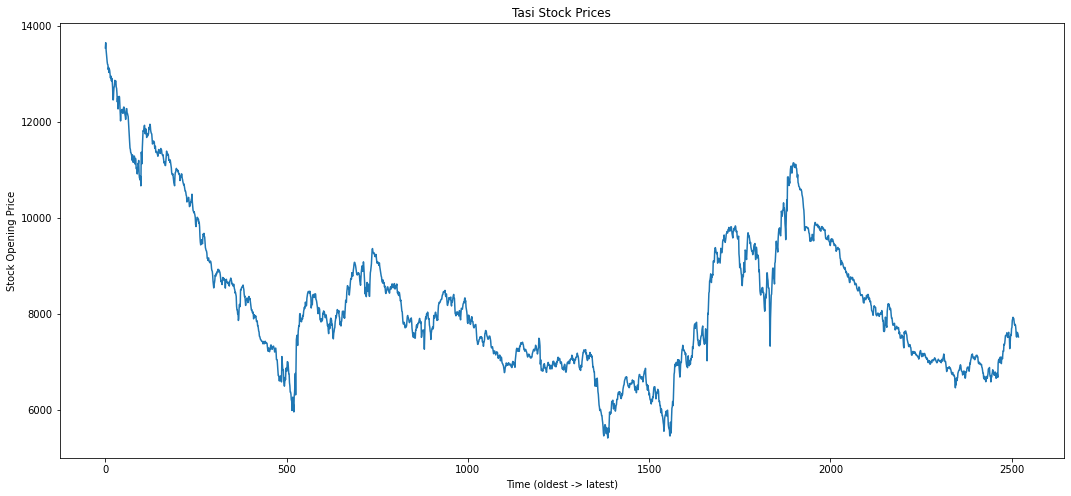

In [35]:
#Virtaulization a. Plotting the Open price
plt.figure(figsize=(18, 8))
plt.plot(stock_data['Open'])
plt.title("Tasi Stock Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Opening Price")
plt.show()

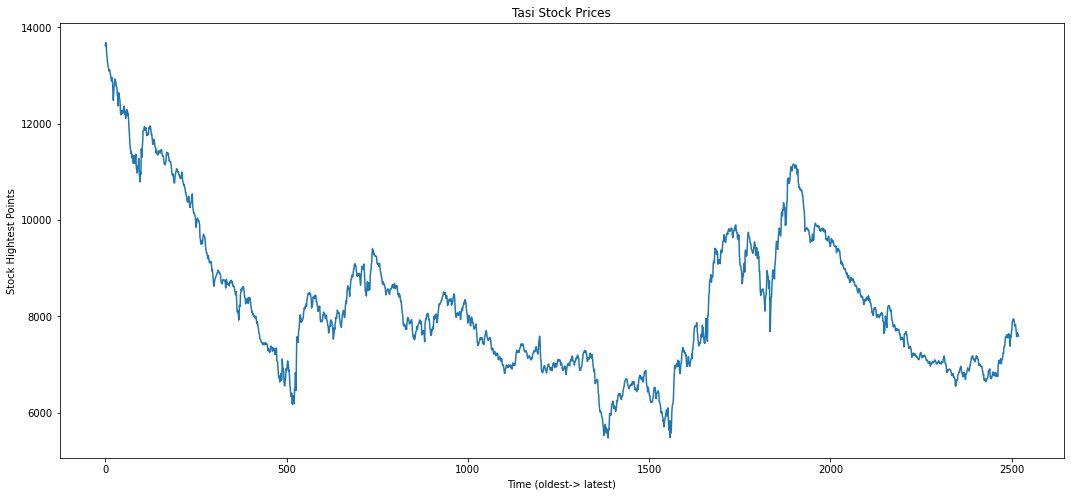

In [36]:
# Plotting the High price
plt.figure(figsize=(18, 8))
plt.plot(stock_data['High'])
plt.title("Tasi Stock Prices")
plt.xlabel("Time (oldest-> latest)")
plt.ylabel("Stock Hightest Points")
plt.show()

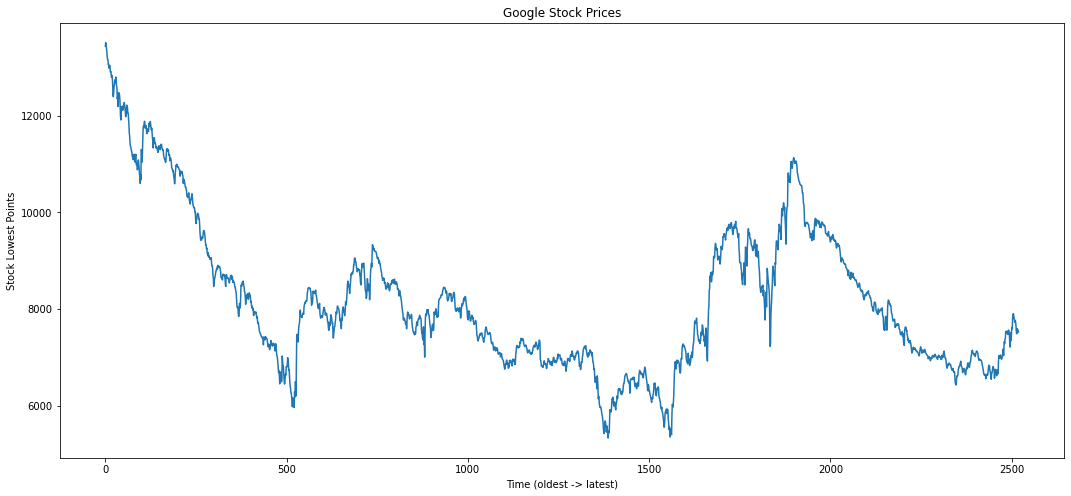

In [37]:
# Plot the Low price
plt.figure(figsize=(18, 8))
plt.plot(stock_data['Low'])
plt.title("Google Stock Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Lowest Points")
plt.show()

In [38]:
#Select feature
#Selecte Open, High, Low, Volumn and Close columns.
#Put close column to the last one as the target.
input_feature = stock_data[['Open', 'High', 'Low']]
input_data = input_feature.values

In [39]:
input_data.shape

(2520, 3)

In [21]:
for i in range(2520, 3):
  float(str(i).replace(",", ""))

In [40]:
scaler = MinMaxScaler(feature_range=(0,10))
input_data = scaler.fit_transform(input_data)


In [41]:
#Create data
lookback = 60
total_size = len(stock_data)

In [42]:
X=[]
y=[]
for i in range(0, total_size-lookback): # loop data set with margin 50 as we use 50 days data for prediction
    t=[]
    for j in range(0, lookback): # loop for 50 days
        current_index = i+j
        t.append(input_data[current_index, :]) # get data margin from 50 days with marging i
    X.append(t)
    y.append(input_data[lookback+i, 2])

In [43]:
len(X), len(y)

(2460, 2460)

In [44]:
#Split train, validate and test data
X, y= np.array(X), np.array(y)
X.shape, y.shape

((2460, 60, 3), (2460,))

In [45]:
test_size = 120 

X_test = X[-test_size:]
Y_test = y[-test_size:]

X_rest = X[: -test_size]
y_rest = y[: -test_size]

X_train, X_valid, y_train, y_valid = train_test_split(X_rest, y_rest, test_size = 0.15, random_state = 101)

In [46]:
#Reshape data
X_train = X_train.reshape(X_train.shape[0], lookback, 3)
X_valid = X_valid.reshape(X_valid.shape[0], lookback, 3)
X_test = X_test.reshape(X_test.shape[0], lookback, 3)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(1989, 60, 3)
(351, 60, 3)
(120, 60, 3)


In [47]:
#Model creat & fit
#1 Create model
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 3)))
regressor.add(Dropout(rate = 0.1))

##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.1))

##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.1))

##add output layer
regressor.add(Dense(units = 1))

In [54]:
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [49]:
# regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [51]:
# regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [55]:
#Fit Model
regressor.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_valid, y_valid), callbacks=callbacks)

Epoch 1/100
249/249 [==============================] - ETA: 0s - loss: 0.9057 - accuracy: 5.0277e-04
Epoch 1: val_loss improved from inf to 0.15099, saving model to model.h5
249/249 [==============================] - 34s 109ms/step - loss: 0.9057 - accuracy: 5.0277e-04 - val_loss: 0.1510 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/100
249/249 [==============================] - ETA: 0s - loss: 0.1807 - accuracy: 5.0277e-04
Epoch 2: val_loss improved from 0.15099 to 0.09343, saving model to model.h5
249/249 [==============================] - 26s 103ms/step - loss: 0.1807 - accuracy: 5.0277e-04 - val_loss: 0.0934 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/100
249/249 [==============================] - ETA: 0s - loss: 0.1575 - accuracy: 5.0277e-04
Epoch 3: val_loss improved from 0.09343 to 0.05910, saving model to model.h5
249/249 [==============================] - 25s 99ms/step - loss: 0.1575 - accuracy: 5.0277e-04 - val_loss: 0.0591 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 

In [56]:
# Evaluate model
predicted_value = regressor.predict(X_test)

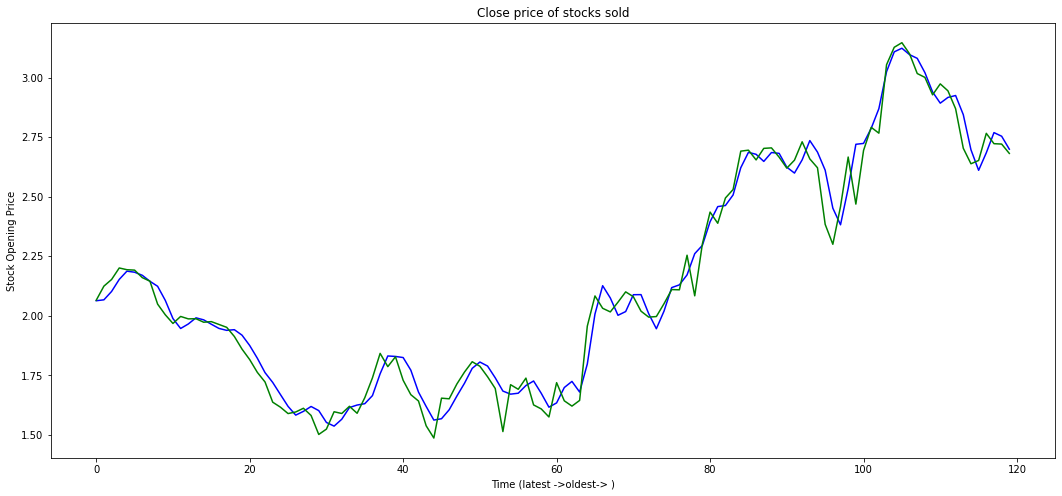

In [57]:
plt.figure(figsize=(18, 8))
plt.plot(predicted_value, color= 'blue')
plt.plot(Y_test, color='green')
plt.title("Close price of stocks sold")
plt.xlabel("Time (latest ->oldest-> )")
plt.ylabel("Stock Opening Price")
plt.show()